In [2]:
from typing import Union, List

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import utils

sns.set(style="darkgrid")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('train.csv', index_col='Id').sample(frac=1)  # sample(frac=1) -> randomize values
target_column = 'SalePrice'
df.shape

(1460, 80)

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,214000
54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
628,80,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,153000
1112,60,RL,80.0,10480,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,205000
1253,20,RL,62.0,9858,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,Shed,600,11,2009,WD,Normal,130000


### Посмотрим на целевую переменную, виден ее разброс. Избавимся от него

In [24]:
df[target_column].describe()

count      1299.000000
mean     187326.822941
std       65753.221819
min      106500.000000
25%      138843.500000
50%      171000.000000
75%      219750.000000
max      440000.000000
Name: SalePrice, dtype: float64

(106475.0, 442567.0100000005)

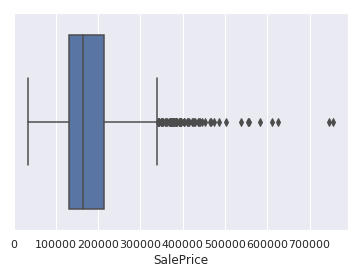

In [4]:
sns.boxplot(df[target_column]);
assert utils.get_count_nan(df, target_column)[target_column] == 0;

df[target_column].quantile(0.1), df[target_column].quantile(0.99)

In [5]:
top_quantile = df[target_column].quantile(0.99)
bottom_quantile = df[target_column].quantile(0.1)
df = df[df[target_column] < top_quantile]  # can try for improve model quality
df = df[df[target_column] > bottom_quantile]  # can try for improve model quality

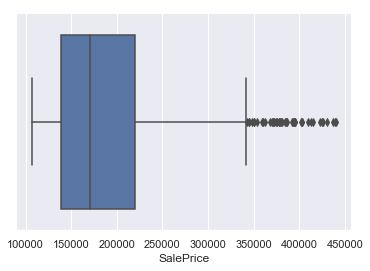

In [12]:
sns.boxplot(df[target_column]);

In [13]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,136905
360,60,RL,78.0,12011,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,280000
316,60,RL,71.0,7795,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,188500
1082,20,RL,75.0,7500,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,133000
1316,60,RL,85.0,11075,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,206900


### Построим зависимости все переменных от целевой

In [4]:
all_columns = [column for column in df.columns if column != target_column]
print('Count columns=%d \n %s' % (len(all_columns), all_columns))

Count columns=79 
 ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAr

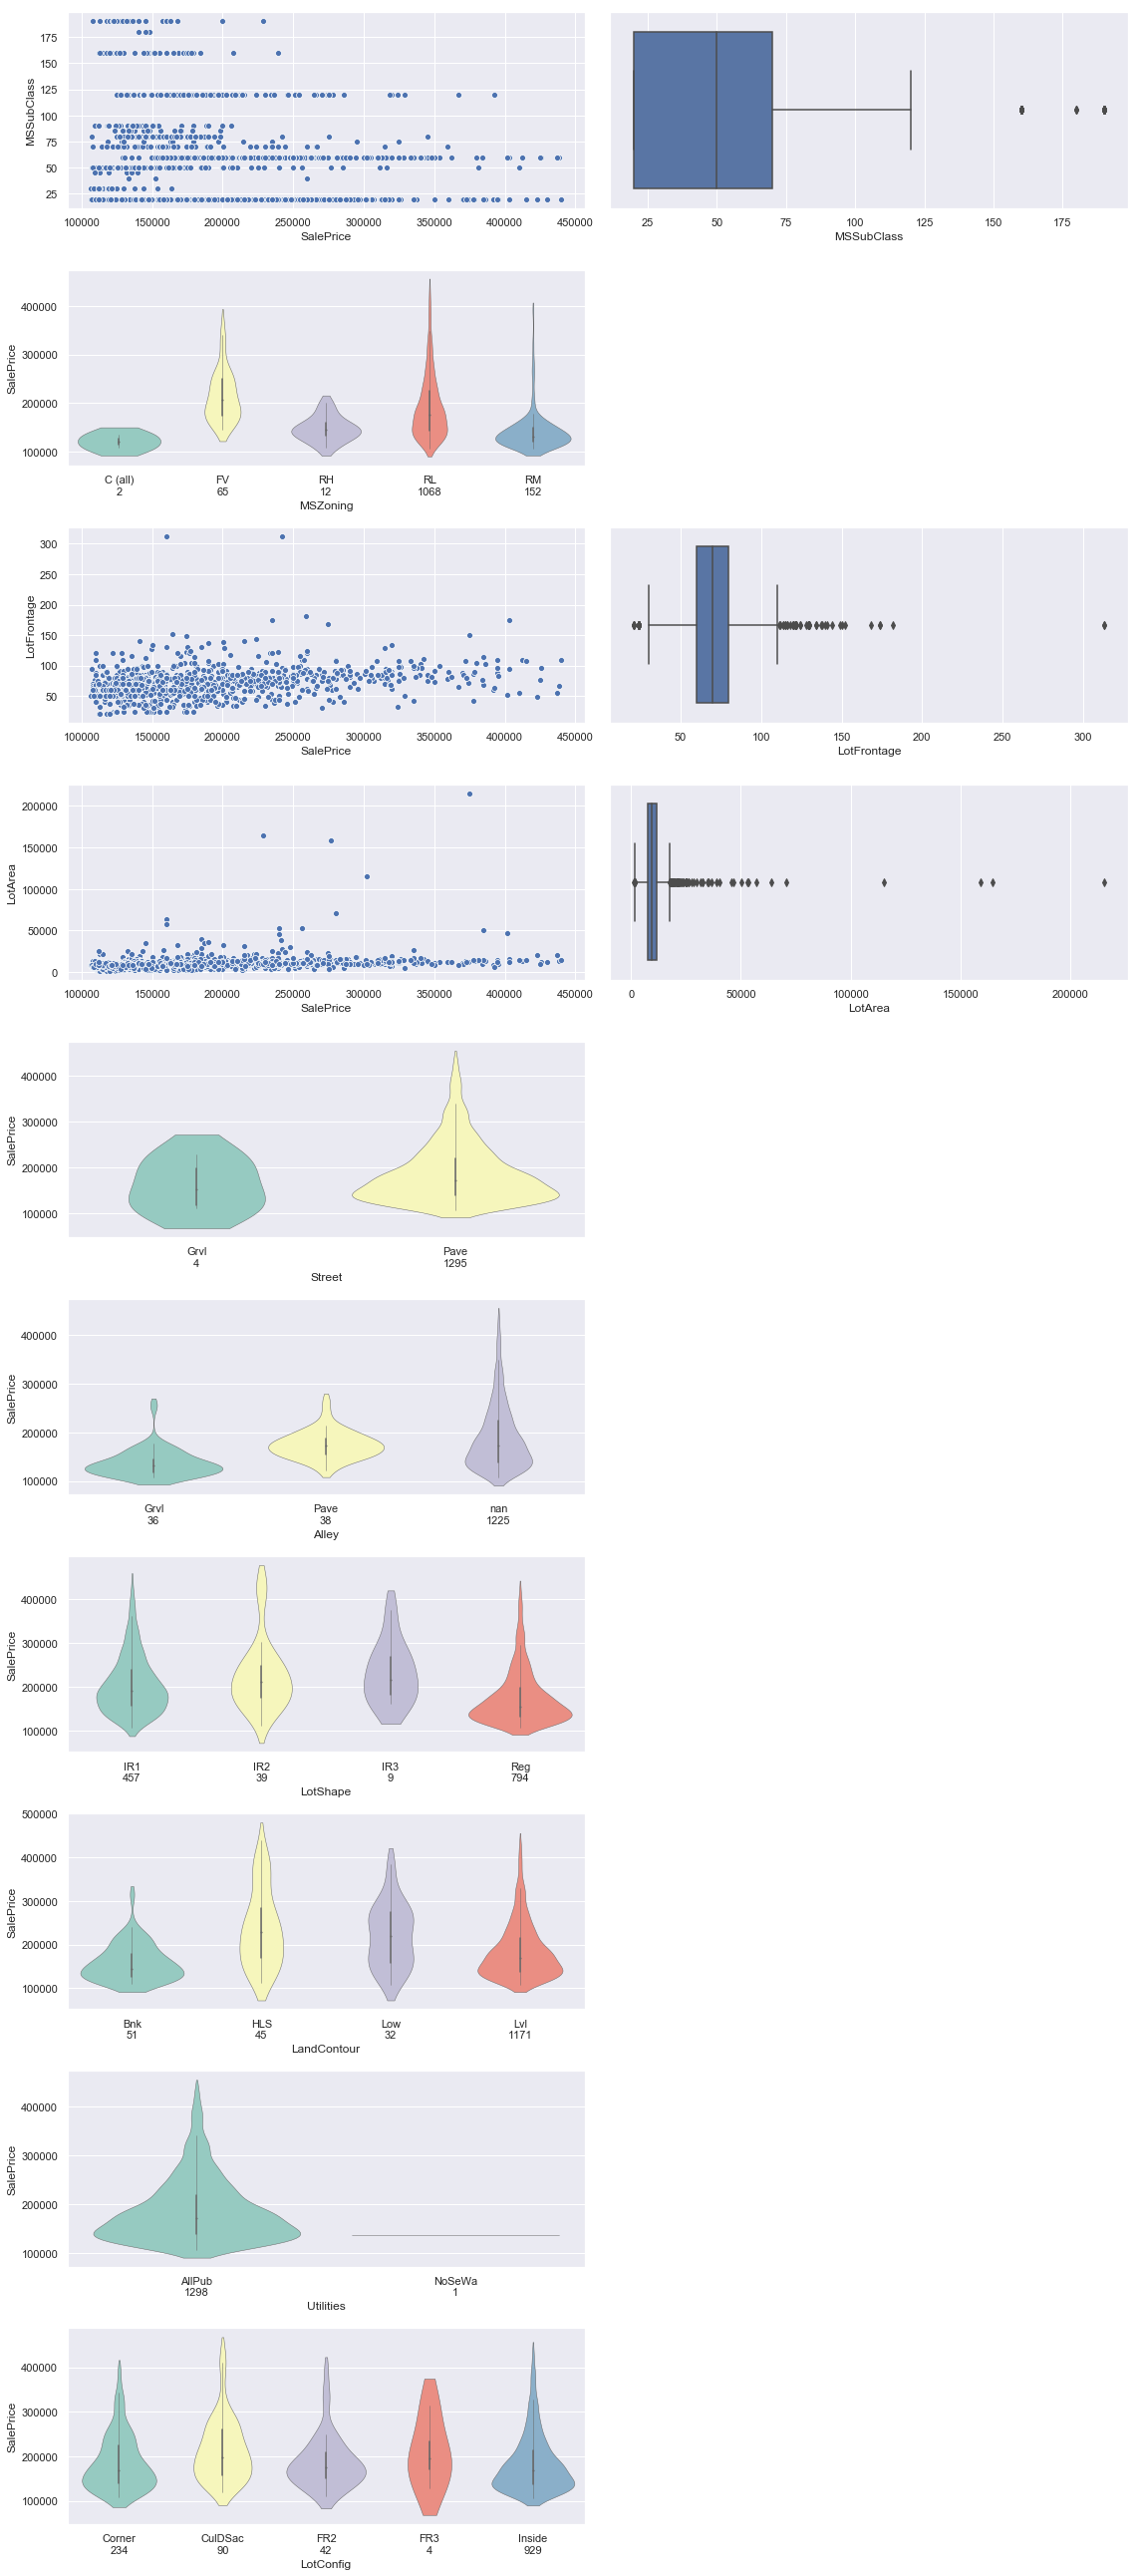

In [7]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[:10])

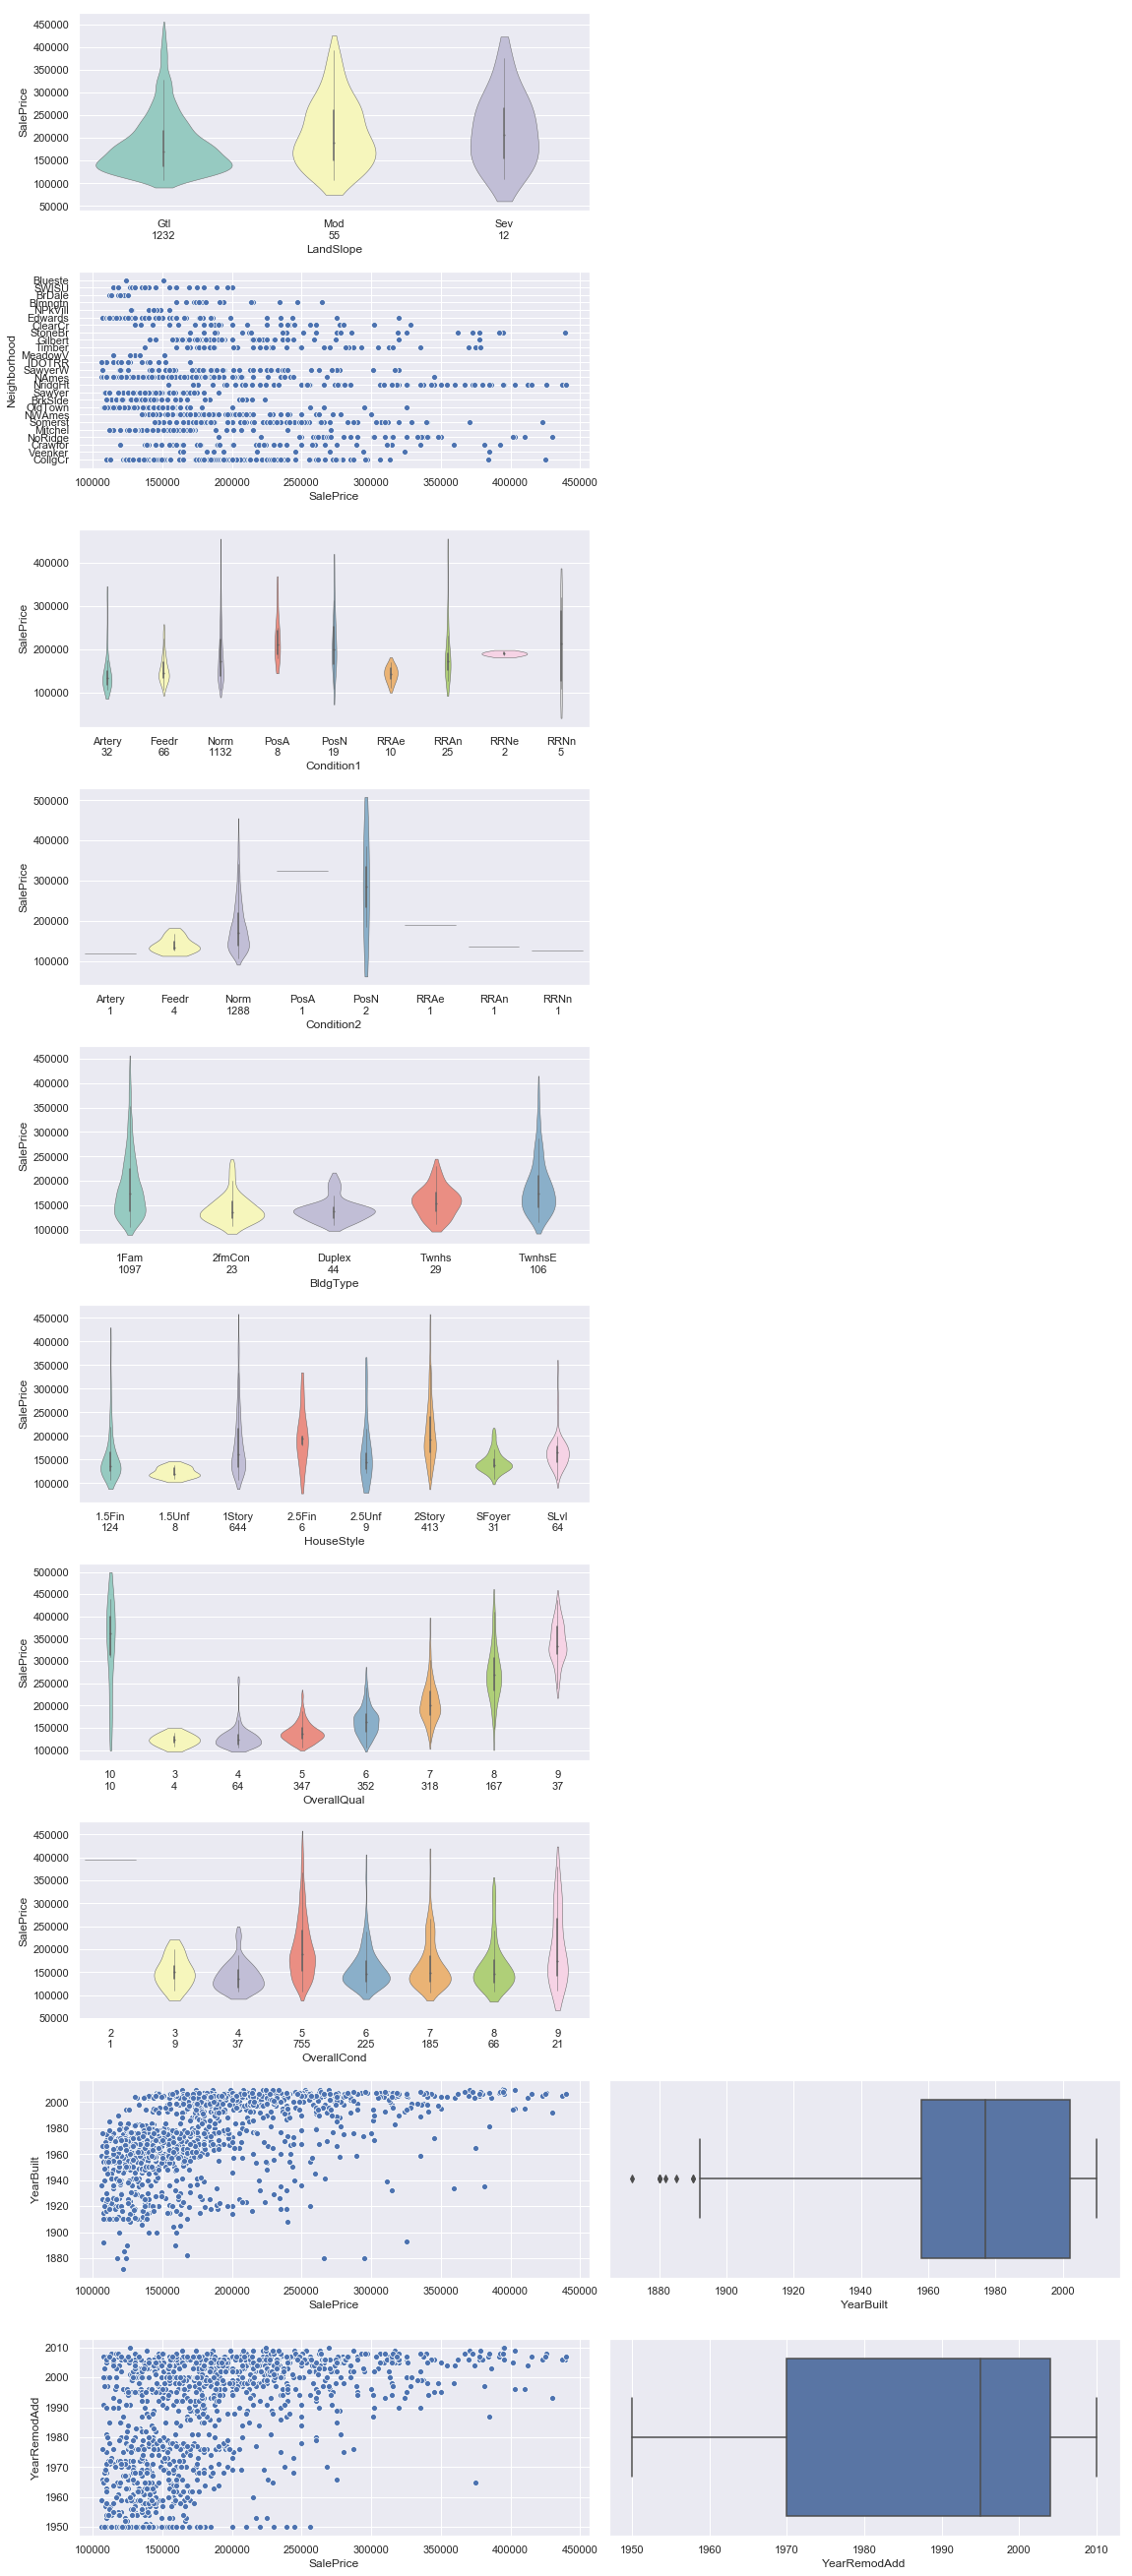

In [8]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[10:20])

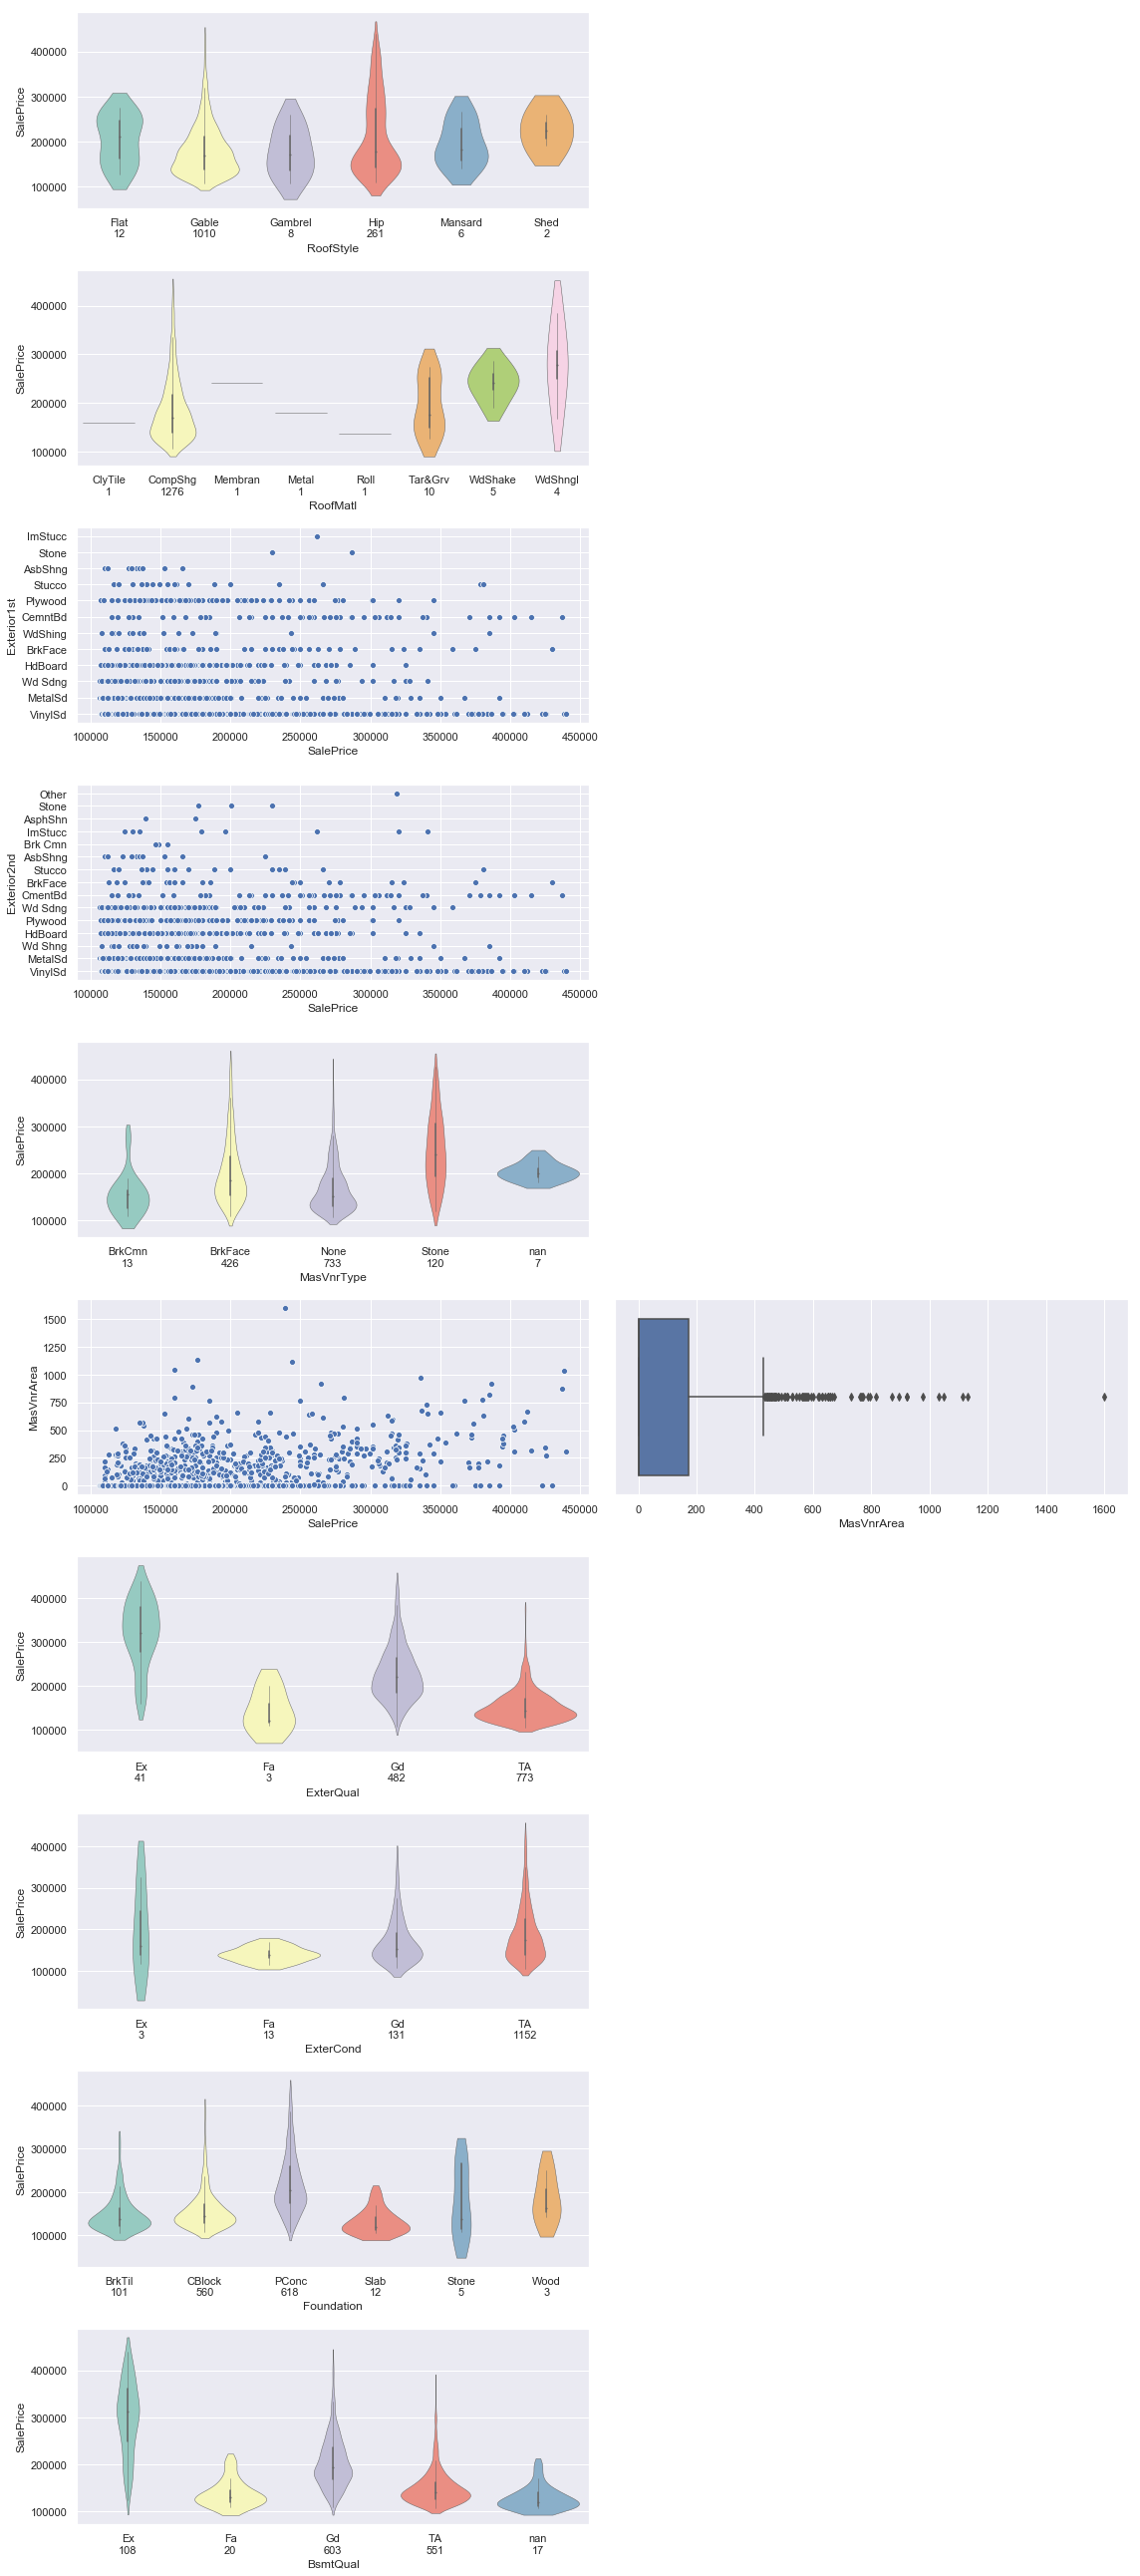

In [9]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[20:30])

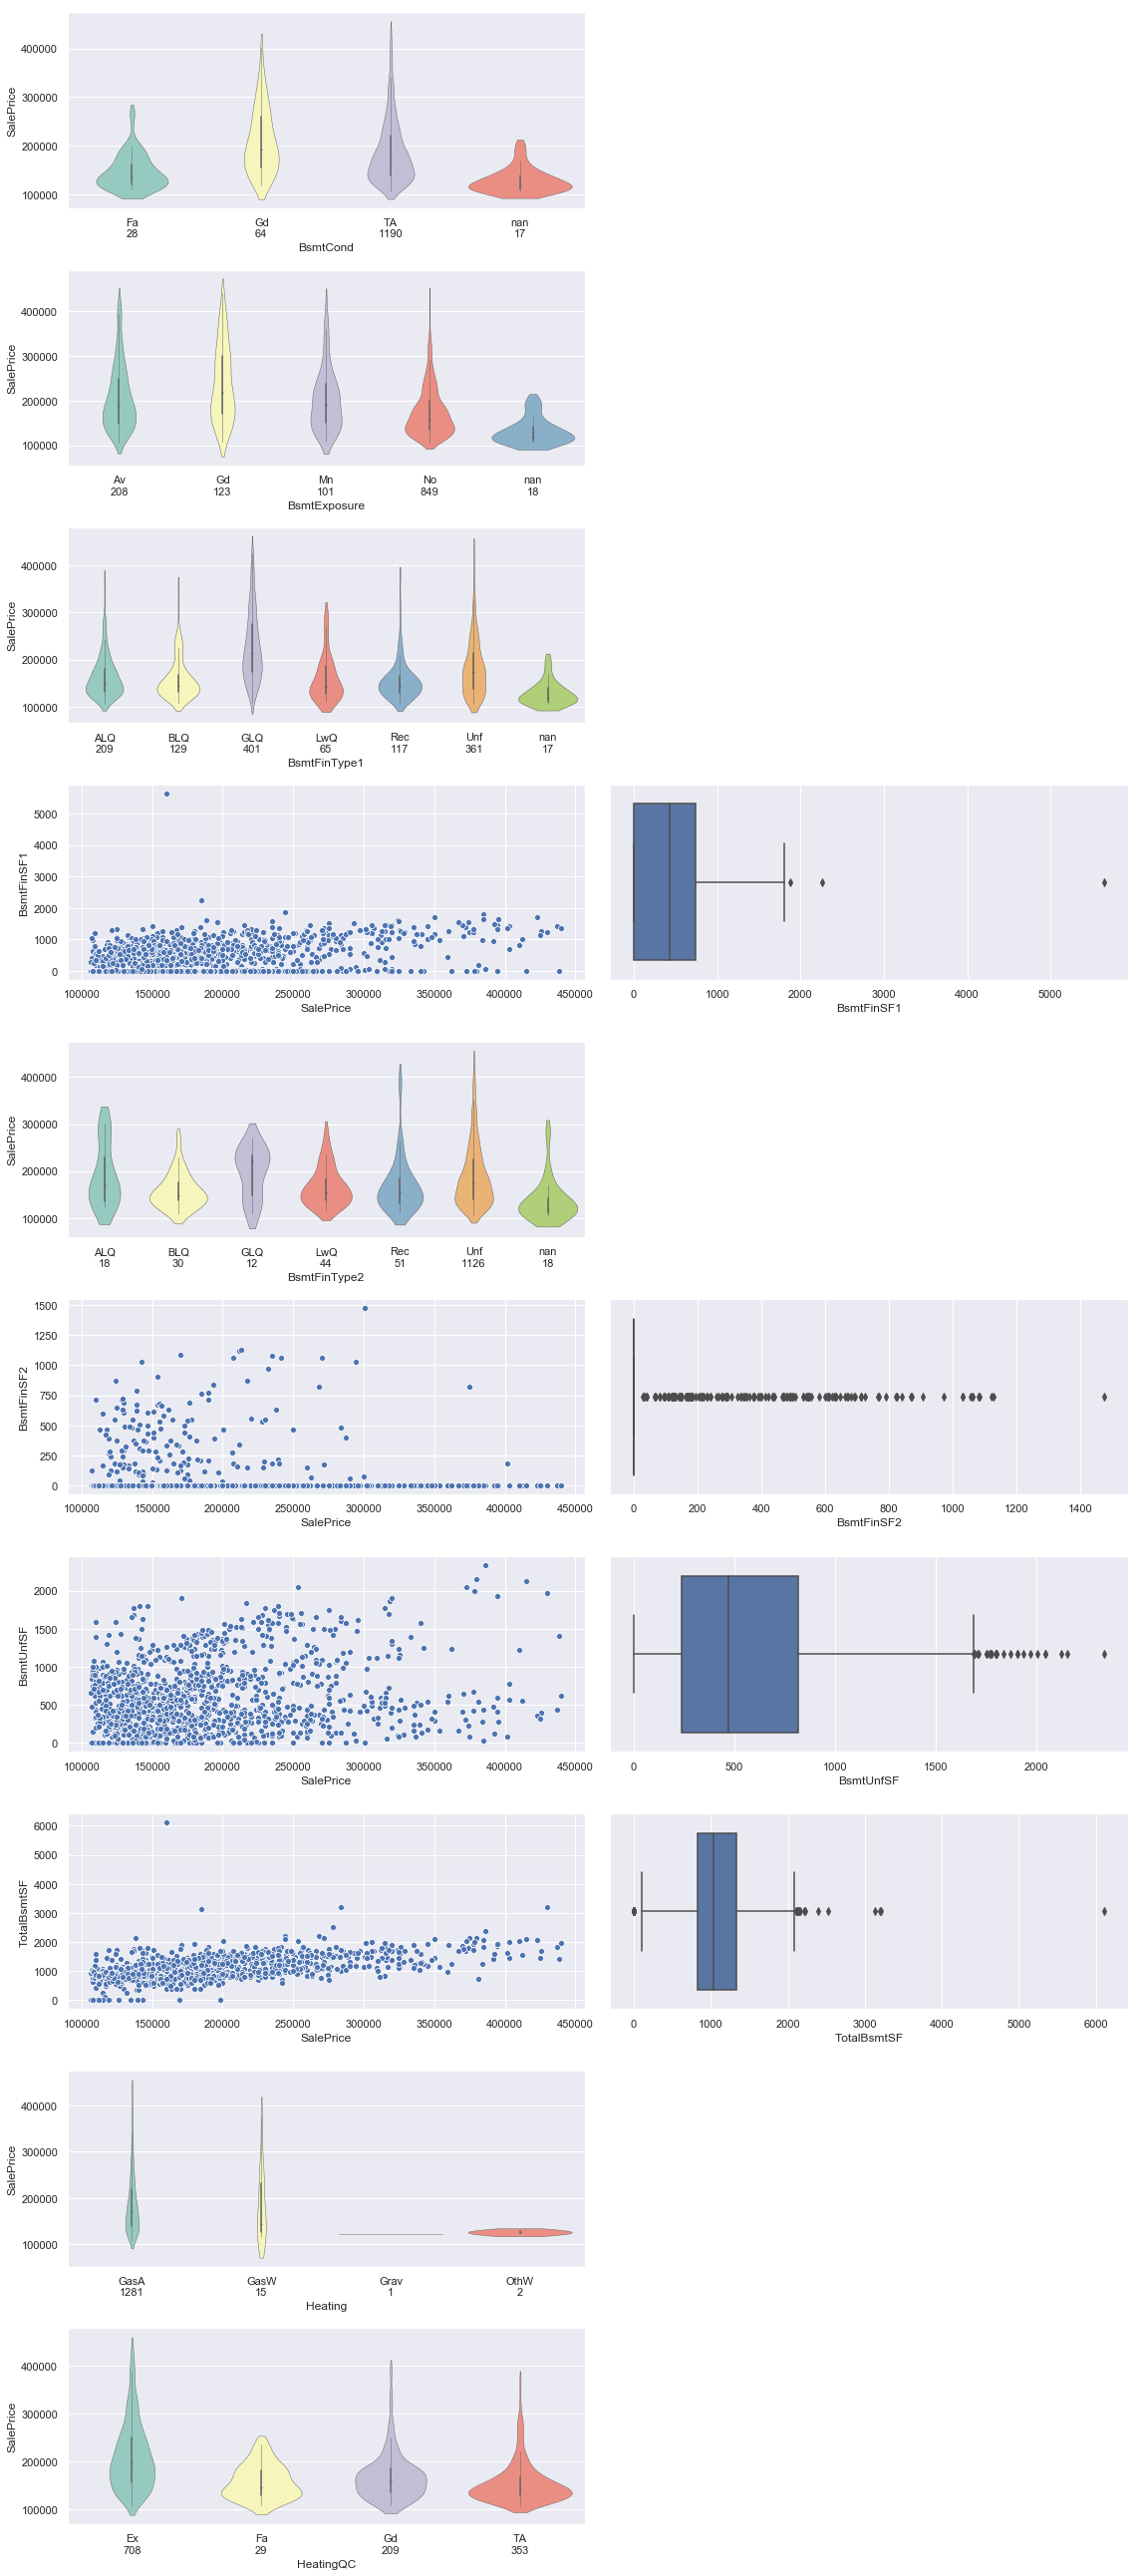

In [10]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[30:40])

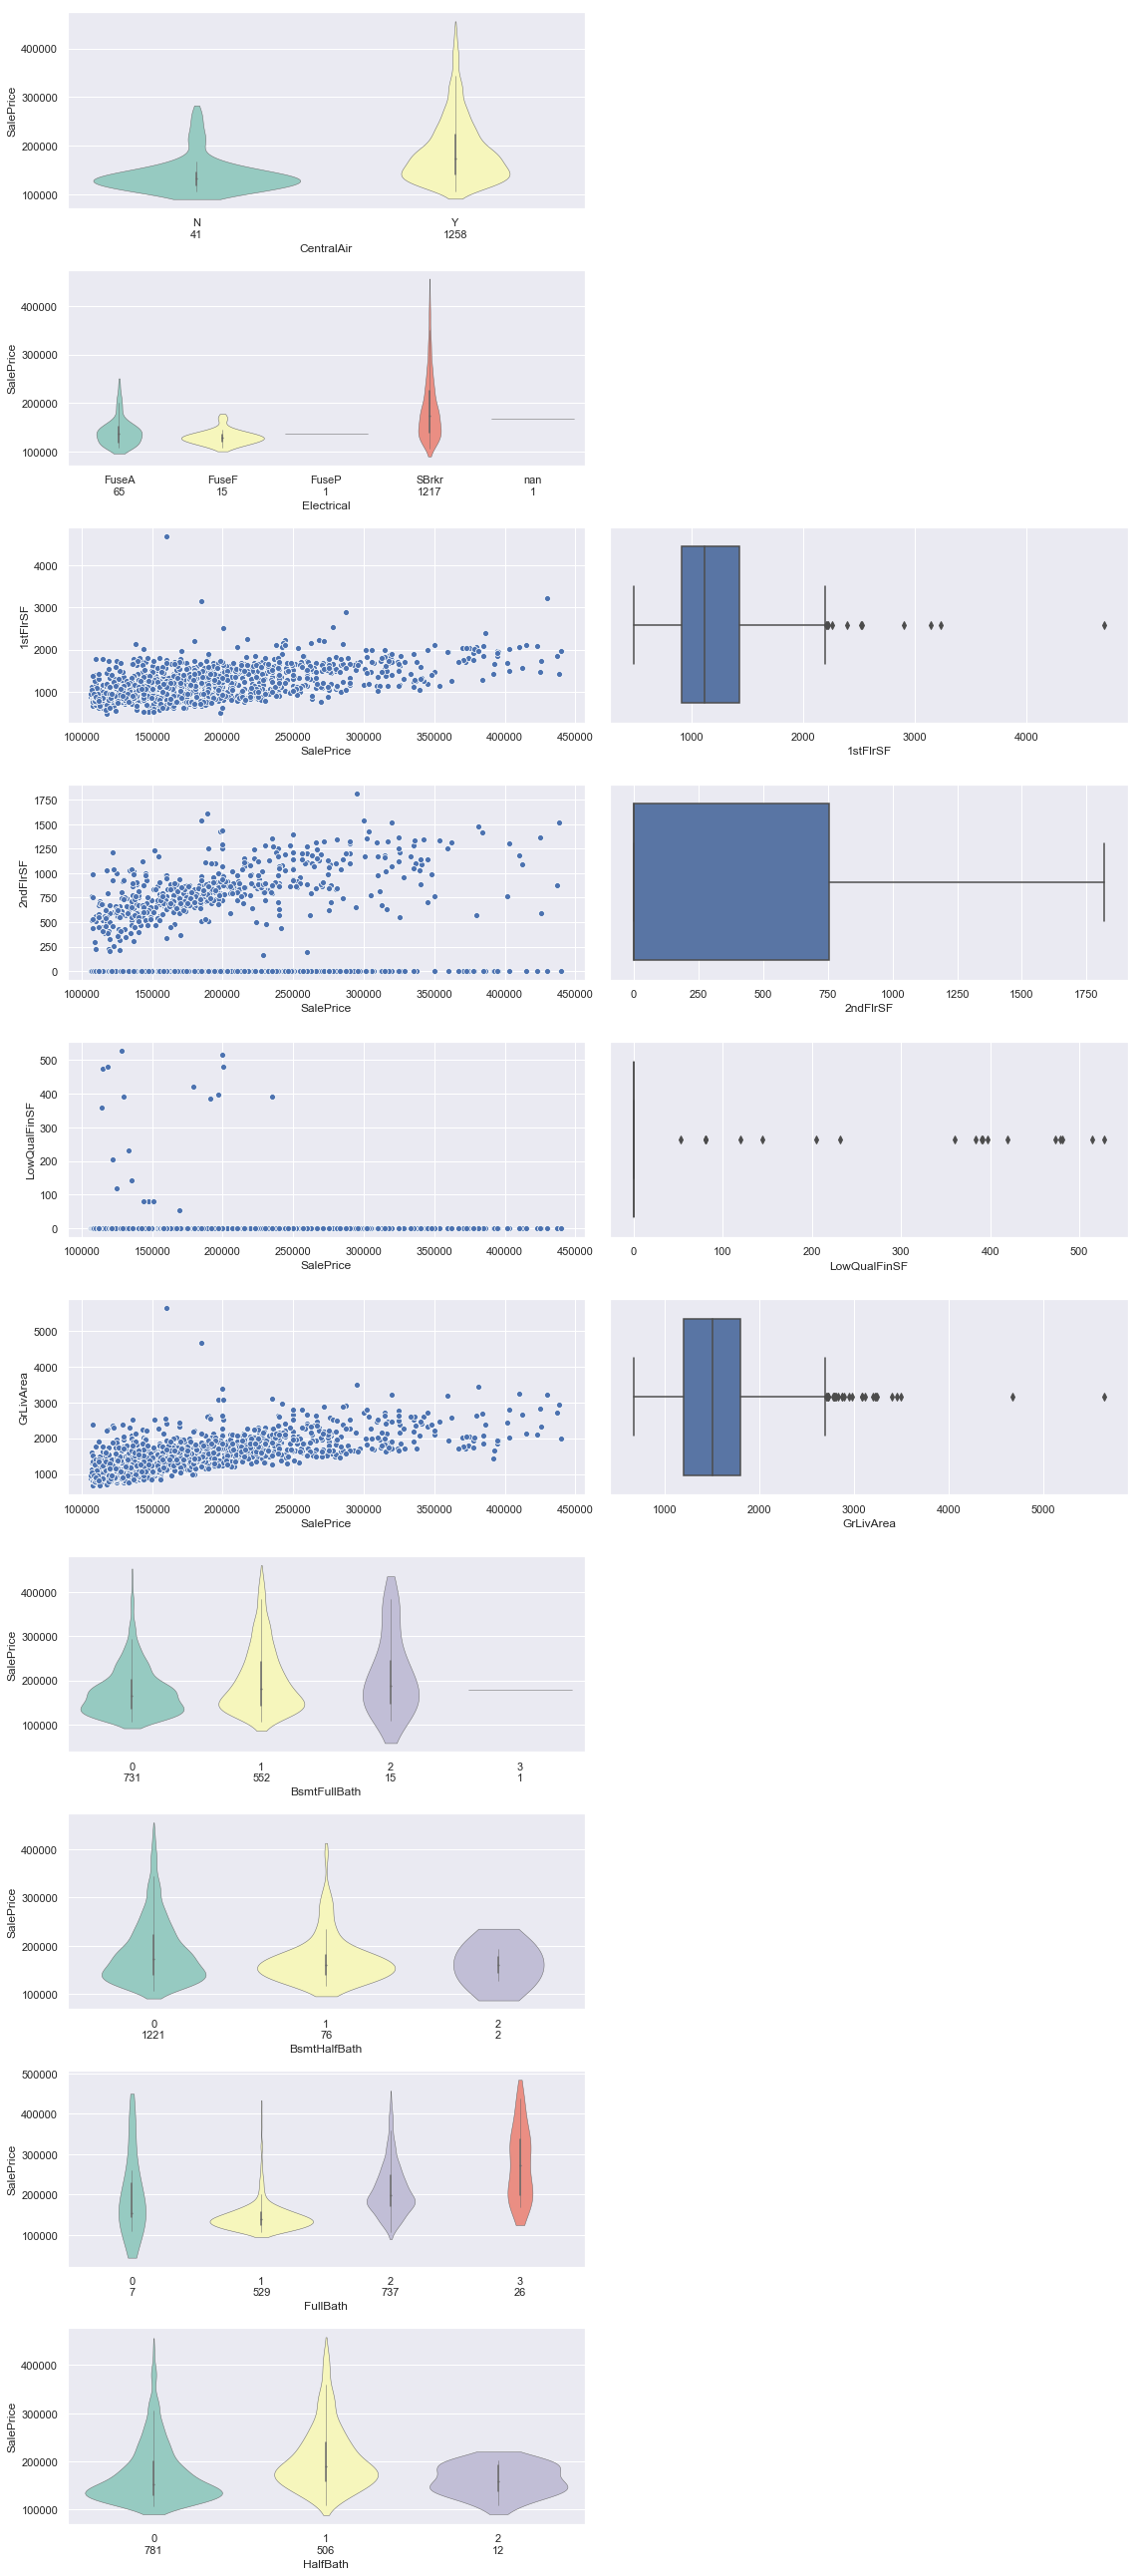

In [11]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[40:50])

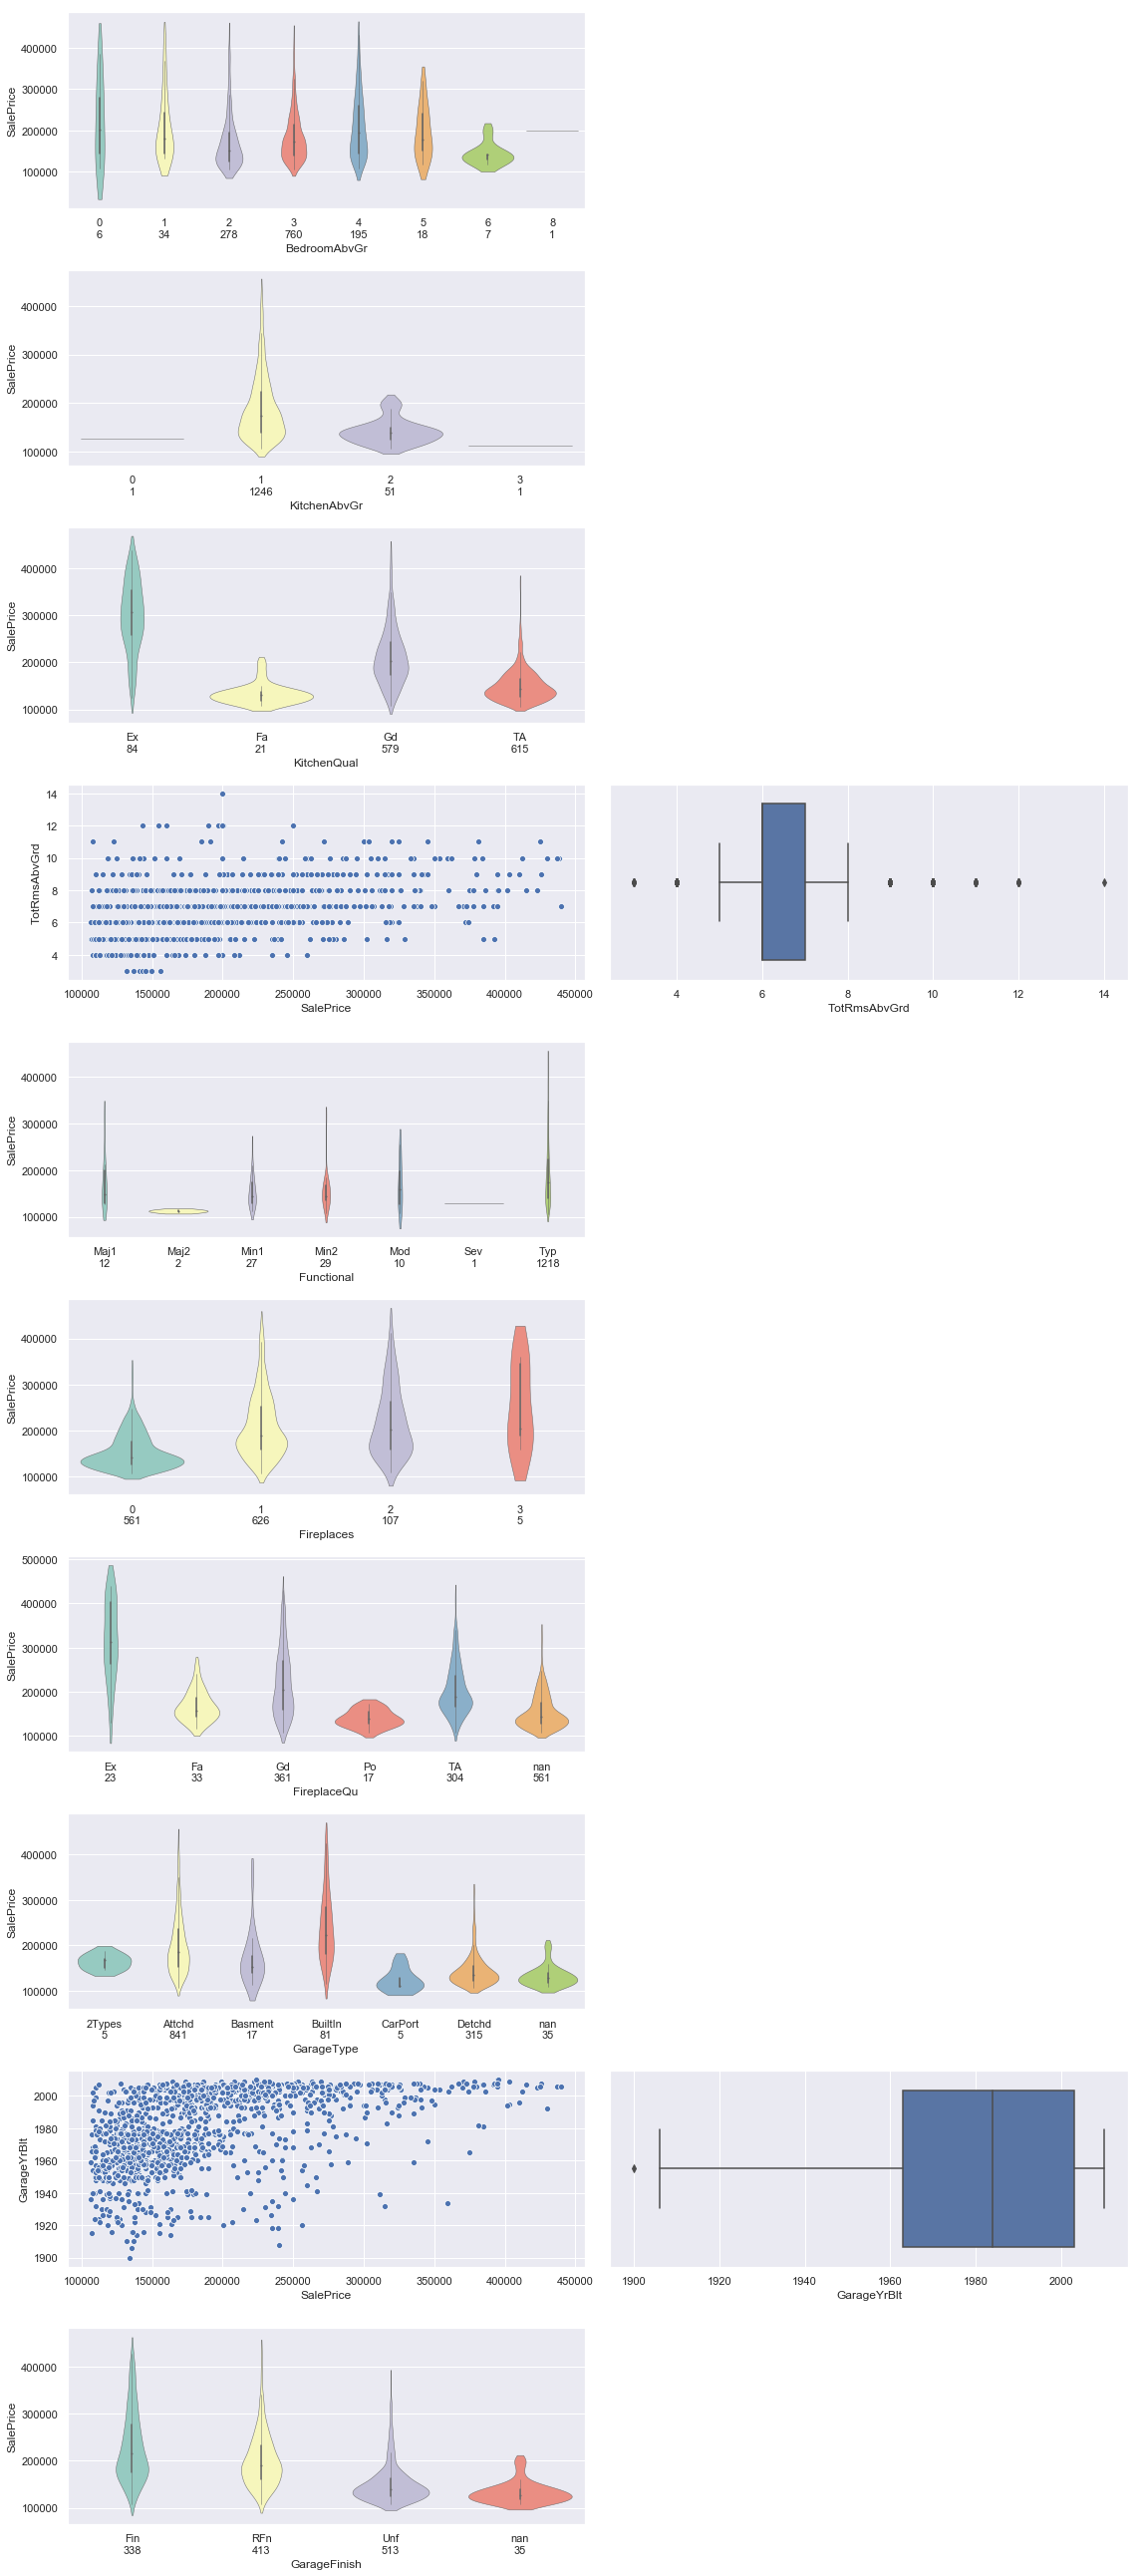

In [12]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[50:60])

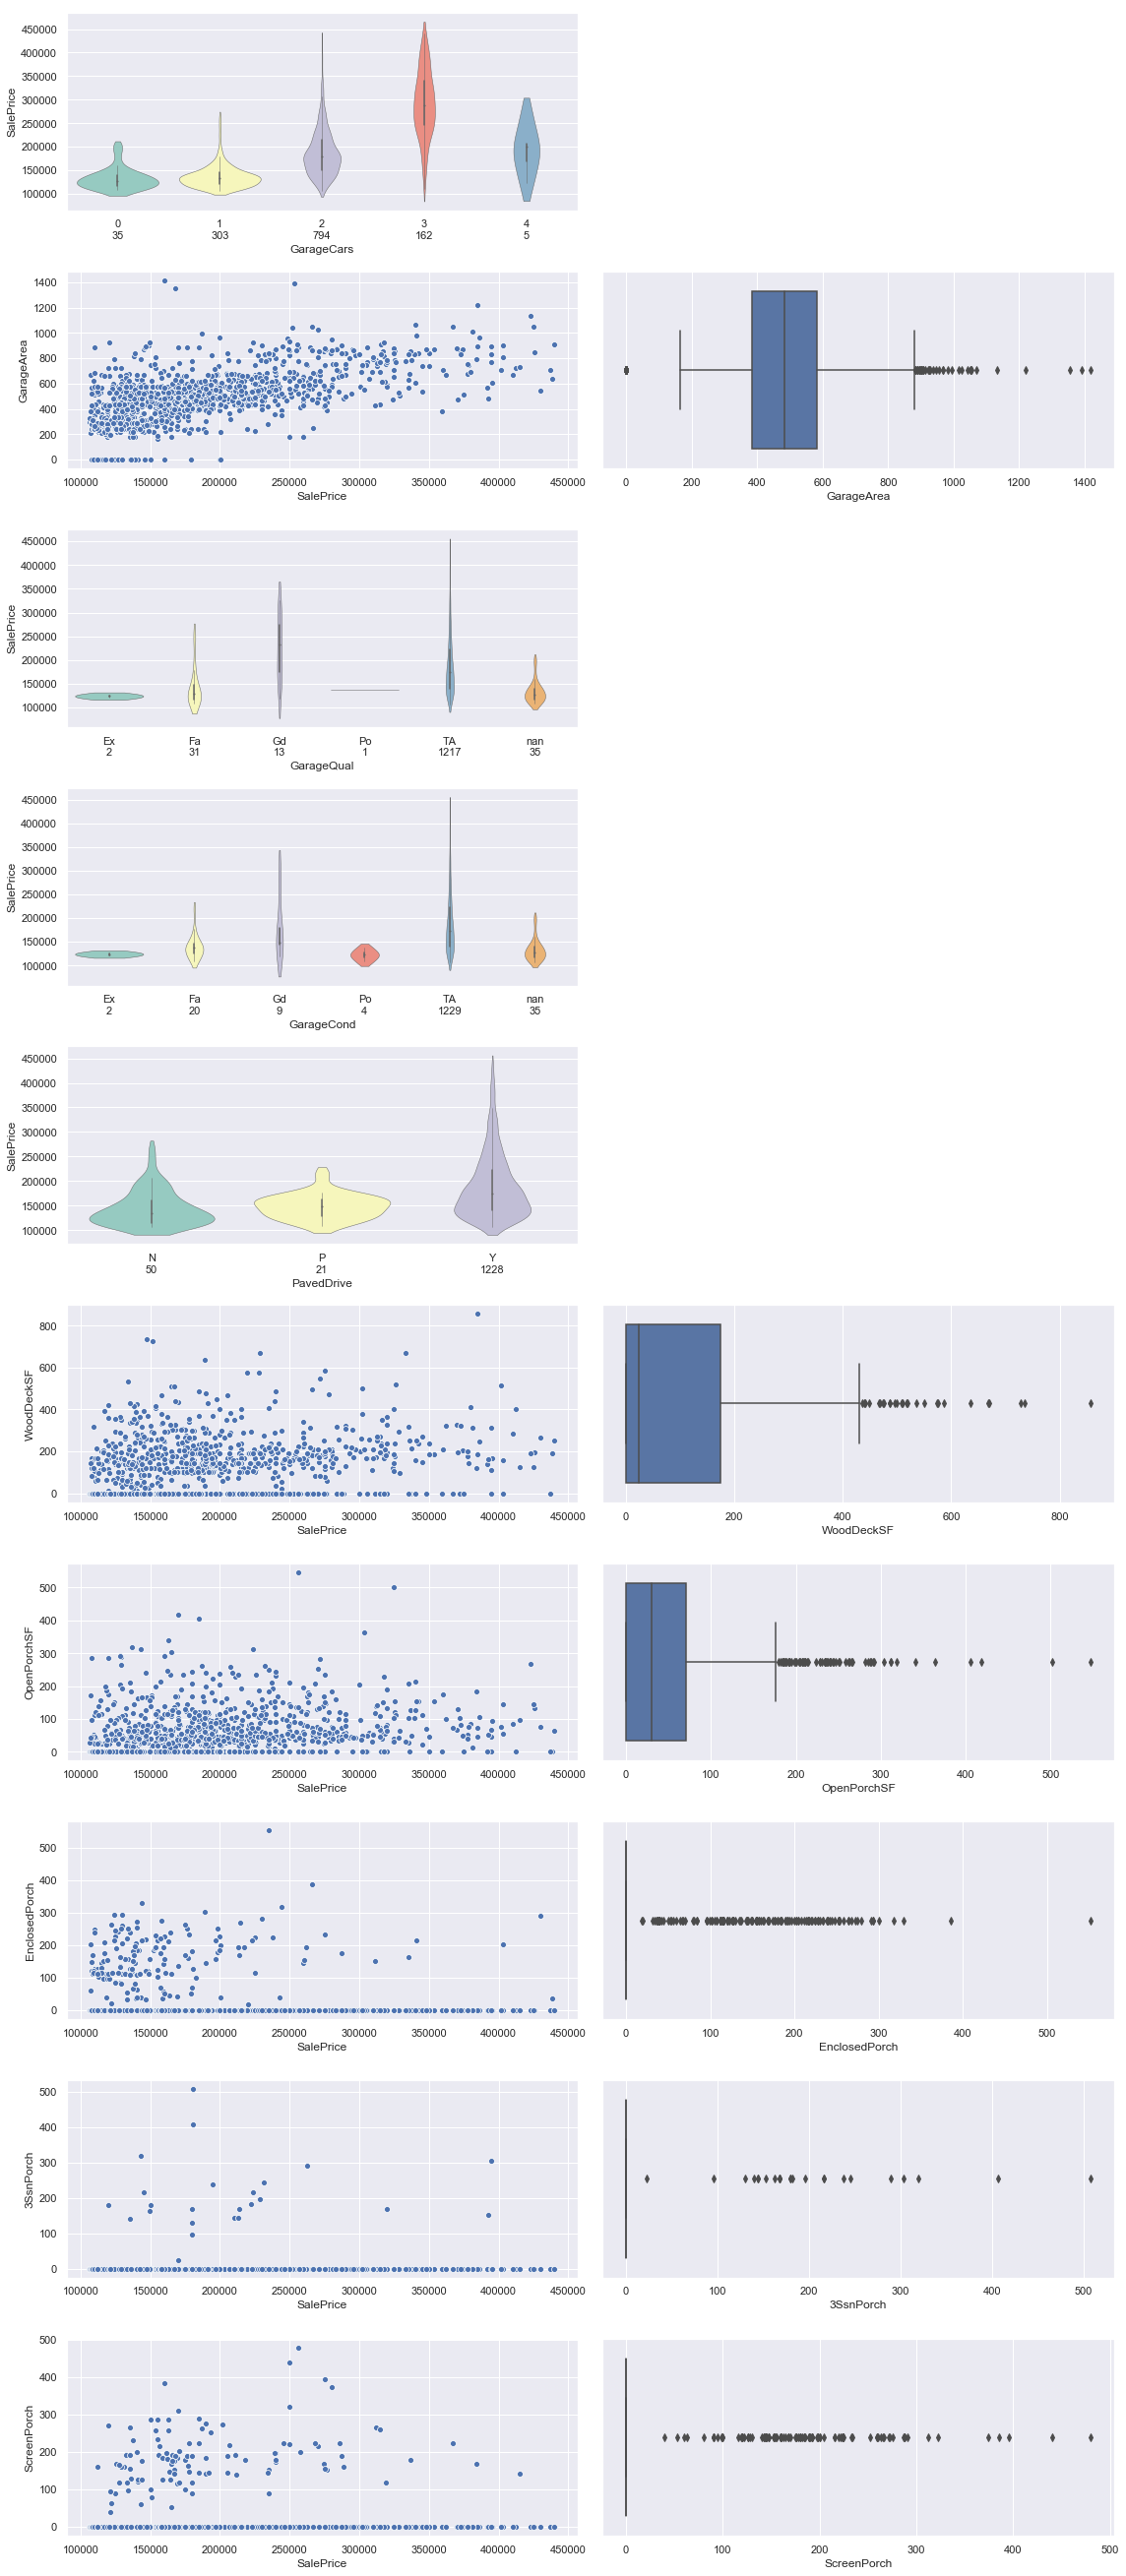

In [14]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[60:70])

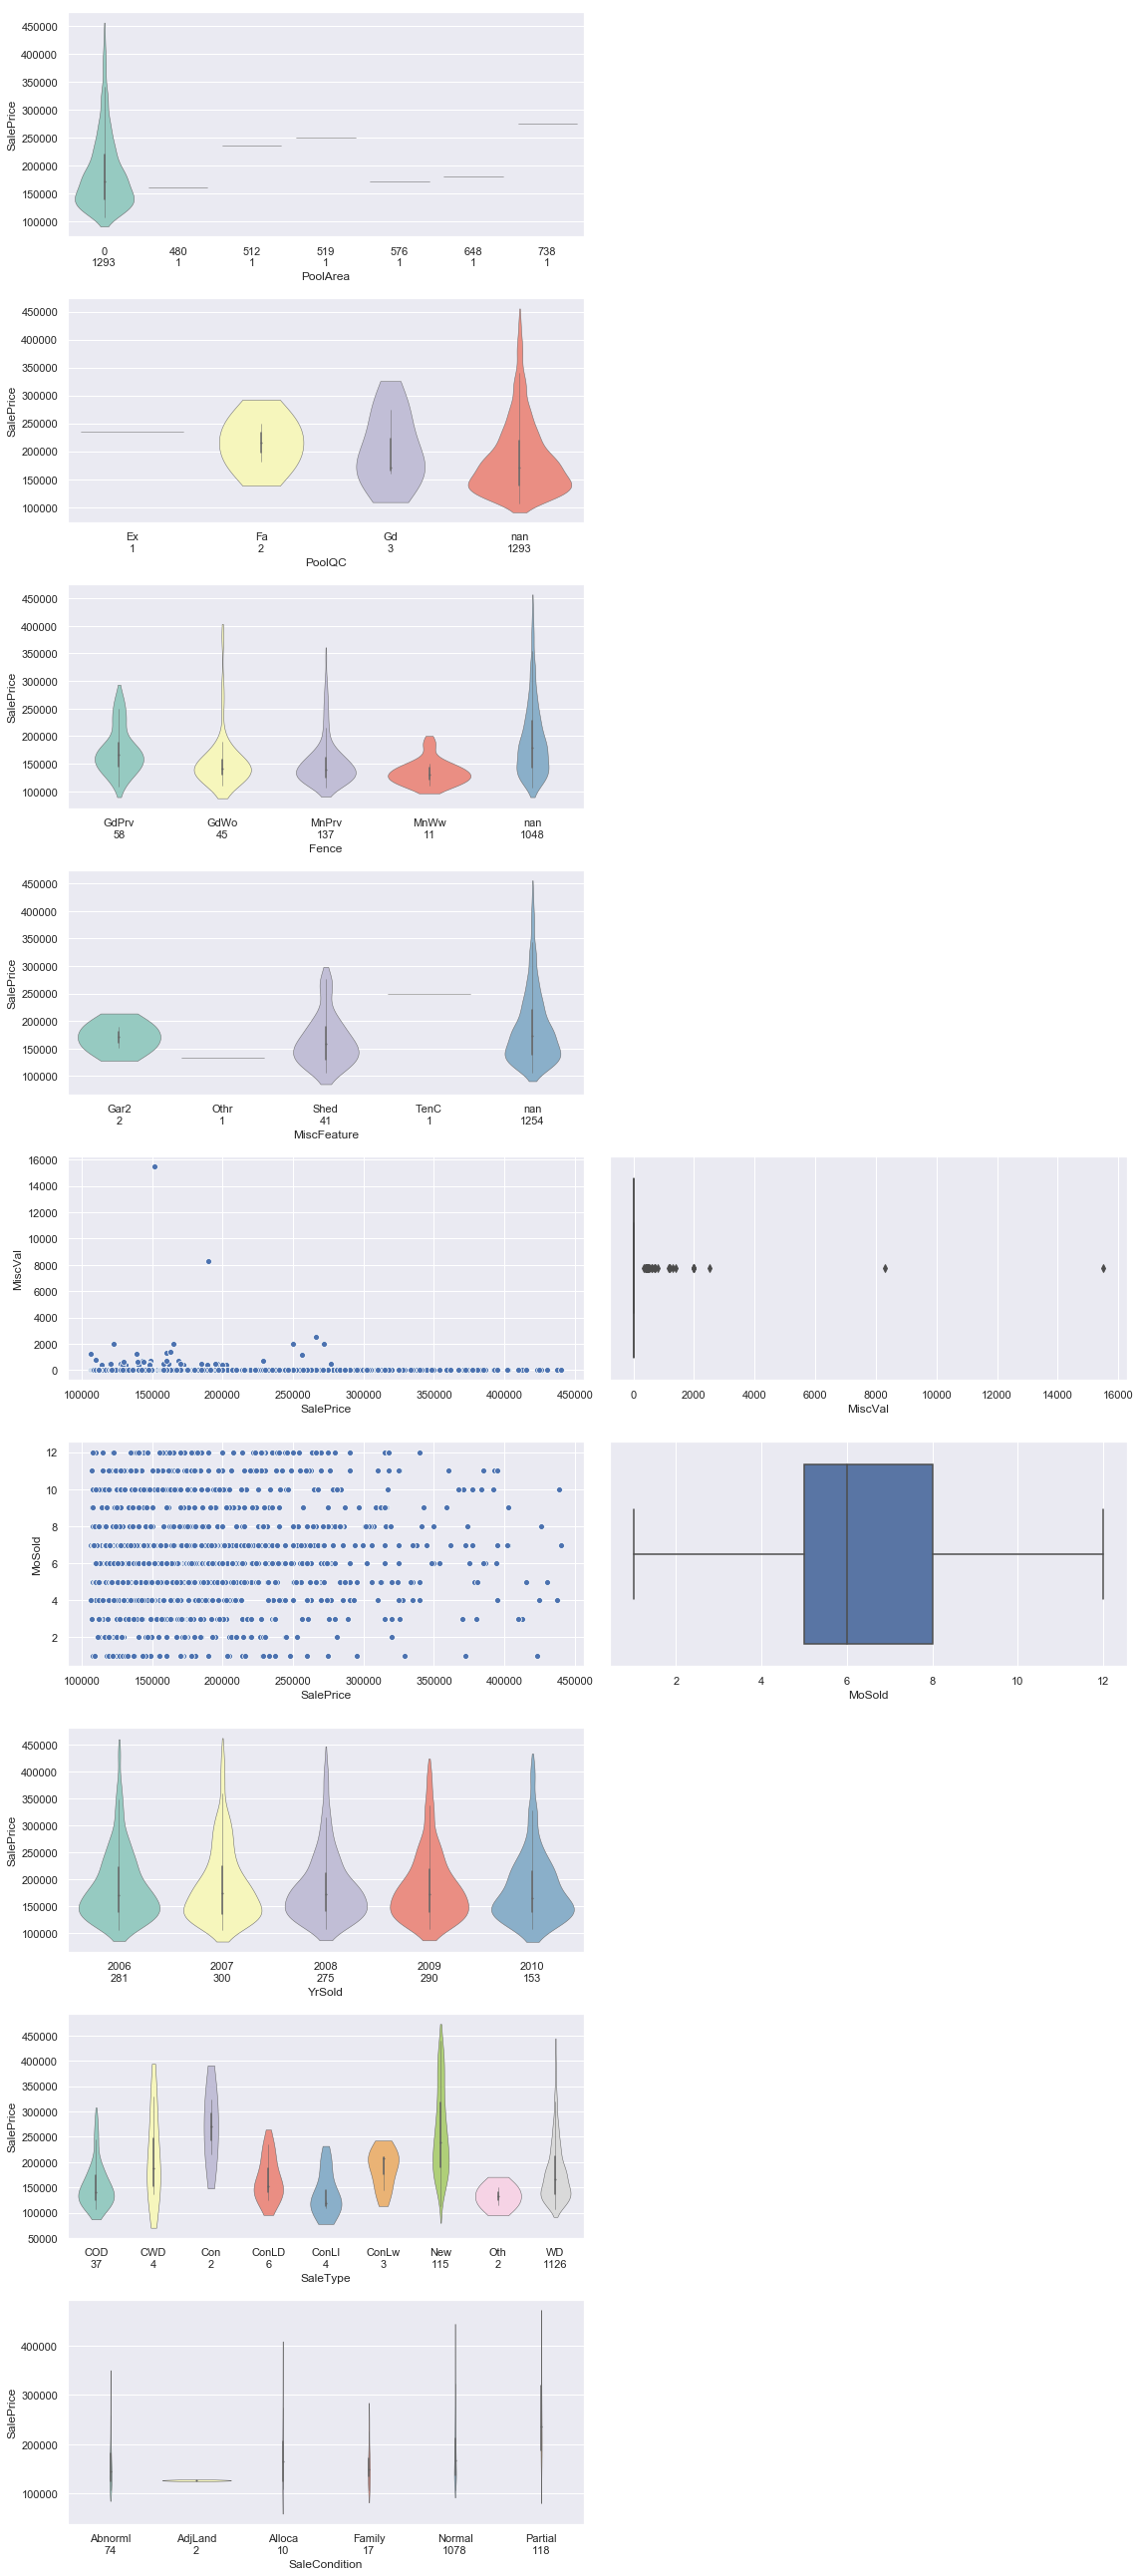

In [15]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[70:80])

По графикам видно, где категориальные данные, какие стоит брать, а какие нет

Построим матрицу корреляций
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [54]:
categorical_values = [
    'MSZoning', 'LotShape', 'BldgType', 'HouseStyle', 'MasVnrType', 'ExterQual', 'Foundation',
    'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
    'GarageFinish', 'YrSold', 'SaleType',
]

variable_values = [
    'MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
    'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 
    'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
    'GarageCars', 'GarageArea', 'MoSold',
]

base_df = df[variable_values + categorical_values + [target_column]]

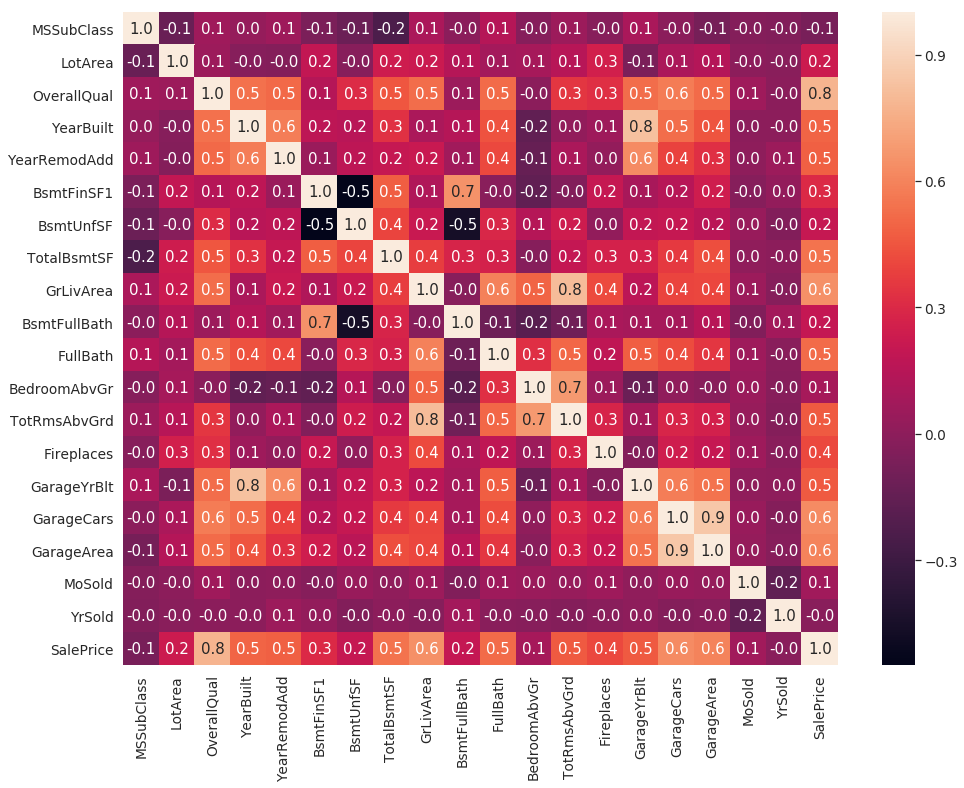

In [40]:
plt.subplots(figsize=(16, 12))
corrmat = base_df.corr()
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, fmt='.1f');

Посмотрим кто тут наиболее коррелирован

In [37]:
corrmat.unstack().sort_values(ascending=False).drop_duplicates().head(5)

SalePrice    SalePrice       1.000000
GarageCars   GarageArea      0.851881
GarageYrBlt  YearBuilt       0.828754
GrLivArea    TotRmsAbvGrd    0.810592
SalePrice    OverallQual     0.777121
dtype: float64

GarageCars и GarageArea сильно кореллируют 0.85

YrSold совсем не коррелирует с SalePrice

посмотрим на пропущенные данные

In [49]:
delete_columns = {'YrSold'}
variable_values = [v for v in variable_values if v not in delete_columns]
categorical_values = [v for v in categorical_values if v not in delete_columns]

In [15]:
utils.get_count_nan(df, variable_values)

{'MSSubClass': 0,
 'LotArea': 0,
 'OverallQual': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'BsmtFinSF1': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'FullBath': 0,
 'BedroomAbvGr': 0,
 'TotRmsAbvGrd': 0,
 'Fireplaces': 0,
 'GarageYrBlt': 35,
 'GarageCars': 0,
 'GarageArea': 0,
 'MoSold': 0}

In [42]:
# более крутой способ (из статьи)
total = base_df.isnull().sum().sort_values(ascending=False)
percent = (base_df.isnull().sum()/base_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(8)

,Total,Percent
GarageYrBlt,35,0.026944
GarageFinish,35,0.026944
GarageType,35,0.026944
BsmtExposure,18,0.013857
BsmtFinType1,17,0.013087
BsmtQual,17,0.013087
MasVnrType,7,0.005389
TotalBsmtSF,0,0.000000


### Обработаем данные

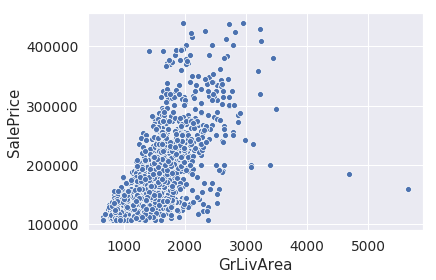

In [66]:
sns.scatterplot(df['GrLivArea'], df[target_column])

In [215]:
def series_to_float(array: pd.Series) -> np.ndarray:
    return array.map(float).values


def get_abroad_values(array: np.ndarray, tresh_hold: int = 4) -> np.ndarray:
    """
    Get values that were been outside the standard deviation threshold
    
    array: np.ndarray[float]  # required float
    returned: np.ndarray[bool]
    
    example usage:
        float_area = series_to_float(df['GrLivArea'])
        is_abroad_area = get_abroad_values(float_area)
        df.loc[is_abroad_area, 'GrLivArea']
    """
    is_array = len(array.shape) == 1

    if is_array:
        # is array
        matrix = array.reshape(len(array), 1)  # matrix is required for StandardScaler
        scaled = StandardScaler().fit_transform(matrix)[:, 0]
    else:
        scaled = StandardScaler().fit_transform(array)
    return ((scaled > tresh_hold) | (scaled < -1 * tresh_hold))

In [229]:
float_area = series_to_float(df['GrLivArea'])
is_abroad_area = get_abroad_values(float_area)
# print(df.loc[is_abroad_area, 'GrLivArea'])

df[is_abroad_area]['GrLivArea']
df[is_abroad_area].index
# a = df.drop(df[is_abroad_area].index, axis=0)
# float_area = series_to_float(a['GrLivArea'])
# is_abroad_area = get_abroad_values(float_area)
# any(is_abroad_area)

Int64Index([1299, 524], dtype='int64', name='Id')

In [162]:
df['GrLivArea'].map(float).values.reshape(len(df), 1)

array([[1790.],
       [1200.],
       [1869.],
       ...,
       [1939.],
       [ 948.],
       [1196.]])

In [129]:
# стоит удалить выбросы
from sklearn.preprocessing import StandardScaler
area_values = np.matrix(df['GrLivArea'].map(float))
scaled_area = StandardScaler().fit_transform(df[['GrLivArea']])[:, 0]
tresh_hold = 4
outer_areas_indexes = ((scaled_area > tresh_hold) | (scaled_area < -1 * tresh_hold))
print(df.loc[outer_areas_indexes, 'GrLivArea'])


Id
1299    5642
524     4676
Name: GrLivArea, dtype: int64


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [128]:
# # df[['GrLivArea']].apply(lambda values: list(map(float, values)))
a = df['GrLivArea'].map(float)
np.matrix(a)
# StandardScaler?

In [ ]:
df[['GrLivArea']].apply

In [104]:
df.loc?

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[variable_values+categorical_values], df[target_column], test_size=0.15,
)

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, variable_values),
    ('categorical', categorical_transformer, categorical_values),
])
preprocessor.fit(X_train);

In [57]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

### Пообучаем и найдем наилучшую модель

По заданию должны использовать root-mean-square-error

In [46]:
from sklearn.metrics import make_scorer, mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


scoring_rmse = make_scorer(rmse)

In [53]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Train RMSE', rmse(y_train, regressor.predict(X_train)))
print('Test RMSE', rmse(y_test, regressor.predict(X_test)))

Train RMSE 26857.9753763955
Test RMSE 29255.309378286034


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_params = {
    'max_depth': [5, 10, 13, 15], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=17), tree_params, n_jobs=-1, cv=3, verbose=1)
tree_grid.fit(X_train, y_train)

print('Train RMSE', rmse(y_train, tree_grid.predict(X_train)))
print('Test RMSE', rmse(y_test, tree_grid.predict(X_test)))
print('Best params', tree_grid.best_params_)
print('Best scores', tree_grid.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Train RMSE 17267.028516856357
Test RMSE 32285.33758292087
Best params {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best scores 0.7126437875668976


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    1.8s finished


In [15]:
from sklearn.ensemble import RandomForestRegressor

randoms_trees_params = {
    'n_estimators': [10, 100],
    'max_features': [2, 15, 20],
    'max_depth': [10, 15, 20], 
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 5],
}
random_tree_grid = GridSearchCV(RandomForestRegressor(random_state=17), randoms_trees_params, 
                                n_jobs=-1, cv=3, verbose=1)
random_tree_grid.fit(X_train, y_train)

print('Train RMSE', rmse(y_train, random_tree_grid.predict(X_train)))
print('Test RMSE', rmse(y_test, random_tree_grid.predict(X_test)))
print('Best params', random_tree_grid.best_params_)
print('Best scores', random_tree_grid.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    8.9s finished


Train MSE 9954.926997118135
Test MSE 19830.86162295514
Best params {'max_depth': 15, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best scores 0.8433836557160056


In [60]:
from xgboost import XGBRegressor

xgb_params = {
    'min_child_weight': [3, 4],
    'n_estimators': [100, 150, 500, 1000],
    'learning_rate': [0.1, 0.01],
    'gamma': [0.1, 0, 1],
    'max_depth': [3, 5],
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=17), xgb_params, early_stopping_rounds=5,
                        cv=3, verbose=1, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print('Train RMSE', rmse(y_train, xgb_grid.predict(X_train)))
print('Test RMSE', rmse(y_test, xgb_grid.predict(X_test)))
print('Best params', xgb_grid.best_params_)
print('Best scores', xgb_grid.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   12.0s finished


Train RMSE 13877.842555218645
Test RMSE 21682.9847986581
Best params {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 150}
Best scores 0.83358291552564


In [64]:
from catboost import CatBoostRegressor

count_columns = X_train.shape[1]
cat_features = list(range(len(variable_values)+1, count_columns))

# cat.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False, use_best_model=True)

cat_params = {
    'depth': [4, 6, 8],
    'learning_rate' : [0.01, 0.03, 0.1],
}
cat = CatBoostRegressor(iterations=700, cat_features=cat_features, random_seed=17)
cat_grid = GridSearchCV(cat, cat_params, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
cat_grid.fit(X_train, y_train, verbose=0)

print('Train RMSE', rmse(y_train, cat_grid.predict(X_train)))
# print('Test RMSE', rmse(y_test, cat_grid.predict(X_test)))
print('Best params', cat_grid.best_params_)
print('Best scores', cat_grid.best_score_)

Train RMSE 18502.73929336402
Best params {'depth': 4, 'learning_rate': 0.03}
Best scores -652689570.9669526


In [112]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

count_columns = X_train.shape[1]

keras_seq = Sequential()
keras_seq.add(Dense(50, input_dim=count_columns, kernel_initializer='normal', activation='relu'))
keras_seq.add(Dropout(0.4))
keras_seq.add(Dense(60, kernel_initializer='normal', activation='relu'))
keras_seq.add(Dropout(0.4))
keras_seq.add(Dense(1, kernel_initializer='normal'))
keras_seq.compile(loss='mean_squared_error', optimizer='adam')

keras_seq.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)

print('Train RMSE', rmse(y_train, keras_seq.predict(X_train)))
print('Test RMSE', rmse(y_test, keras_seq.predict(X_test)))

Train RMSE 31483.513769134668
Test RMSE 27908.342999532284


### Отдадим kagglе-у ответ

In [61]:
test_df = pd.read_csv('test.csv', index_col='Id')
X_test = test_df[variable_values+categorical_values]
X_test = preprocessor.transform(X_test)

# predicted_test = random_tree_grid.predict(X_test)
predicted_test = xgb_grid.predict(X_test)
test_df['SalePrice'] = predicted_test
test_df.to_csv('answer.csv', columns=['SalePrice'], index_label='Id')

In [62]:
!head answer.csv -n 5

Id,SalePrice
1461,127339.375
1462,164522.94
1463,184828.14
1464,182903.52
